# SVM

In [ ]:

import pandas as pd 
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
import argparse
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [ ]:
def load_data(path, column, rdm_state):
    dataframe = pd.read_csv(path)
    y = dataframe[column].astype(int) # numberize the labels i.e., tranforms True = 1, False = 0
    print("Label Distribution: ")
    print(y.value_counts())
    y = y.values 
    X = dataframe.iloc[:, 7:]
    num_features = len(X.columns) 
    X = X.values
    print("Dataset: ")
    print(f"\nShape of features: {X.shape} (# samples, # features, channel) of type {type(X)}" )
    print(f"Shape of labels: {y.shape} (# samples, ) of type {type(X)}" )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=rdm_state)
    return X_train, X_test, y_train, y_test

In [ ]:
X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test = load_data('cwe_119_train.csv', 'CWE-119', 42)
X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test = load_data('cwe_120_train.csv','CWE-120',42)
X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test = load_data('cwe_469_train.csv','CWE-469',42)
X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test = load_data('cwe_476_train.csv','CWE-476',42)
X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test = load_data('cwe_other_train.csv','CWE-other',42)

Label Distribution: 
1    1174
0    1174
Name: CWE-476, dtype: int64
Dataset: 

Shape of features: (2348, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (2348,) (# samples, ) of type <class 'numpy.ndarray'>


In [ ]:
def predict_report(train_x,test_x,train_y,test_y):
  svm_model = svm.SVC(decision_function_shape='ovo')  # ovo for classification
  svm_model = svm_model.fit(train_x, train_y)
  y_predict = svm_model.predict(test_x)
  print("Accuracy score %.3f" %metrics.accuracy_score(test_y, y_predict))
  print(classification_report(test_y, y_predict))

print("CWE 119")
predict_report(X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test) ##cwe 119
print("CWE 120")
predict_report(X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test) ##cwe 120
print("CWE 469")
predict_report(X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test) ##cwe 469
print("CWE 476")
predict_report(X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test) ##cwe 476
print("CWE other")
predict_report(X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test) ##cwe other

CWE 119
Accuracy score 0.928
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       255
           1       0.92      0.95      0.93       287

    accuracy                           0.93       542
   macro avg       0.93      0.93      0.93       542
weighted avg       0.93      0.93      0.93       542

CWE 120
Accuracy score 0.937
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       507
           1       0.93      0.95      0.94       525

    accuracy                           0.94      1032
   macro avg       0.94      0.94      0.94      1032
weighted avg       0.94      0.94      0.94      1032

CWE 469
Accuracy score 0.908
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.91      0.91      0.91        35

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.

In [ ]:
from sklearn import svm
from sklearn import metrics
svm_model = svm.SVC(decision_function_shape='ovo')  # ovo for classification
svm_model = svm_model.fit(X_cwe_476_train, y_cwe_476_train)

Generate a prediction
prediction shape: (235,)


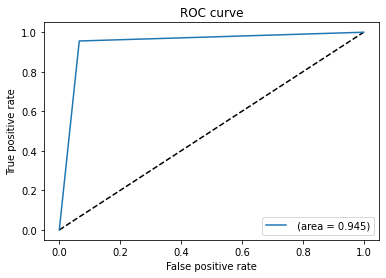

In [ ]:
def generate_roc_plot(model, x_test, y_test):
  # Generate a prediction using model.predict() 
  # and calculate it's shape:
  print("Generate a prediction")
  prediction = model.predict(x_test).ravel()
  print("prediction shape:", prediction.shape)

  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)
  auc_keras = auc(fpr_keras, tpr_keras)

  #generate plot
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras, tpr_keras, label=' (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

  
generate_roc_plot(svm_model, X_cwe_476_test, y_cwe_476_test)

In [ ]:
from sklearn import svm
from sklearn import metrics
def generate_roc_plots(x_train,y_train,x_test, y_test, names):
    fpr, tpr, aucs = [], [], []
    for i in range(5):
        svm_model = svm.SVC(decision_function_shape='ovo')  # ovo for classification
        svm_model = svm_model.fit(x_train[i], y_train[i])
        pred = svm_model.predict(x_test[i])
        print("Accuracy score %.3f" %metrics.accuracy_score(y_test[i], pred))
        print(classification_report(y_test[i], pred))
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test[i], pred)
        auc_keras = auc(fpr_keras, tpr_keras)
        fpr.append(fpr_keras)
        tpr.append(tpr_keras)
        aucs.append(auc_keras)
    #generate plot
    plt.figure(figsize=(9,9))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(5):
        plt.plot(fpr[i], tpr[i], label=' {} (area = {:.3f})'.format(names[i],aucs[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

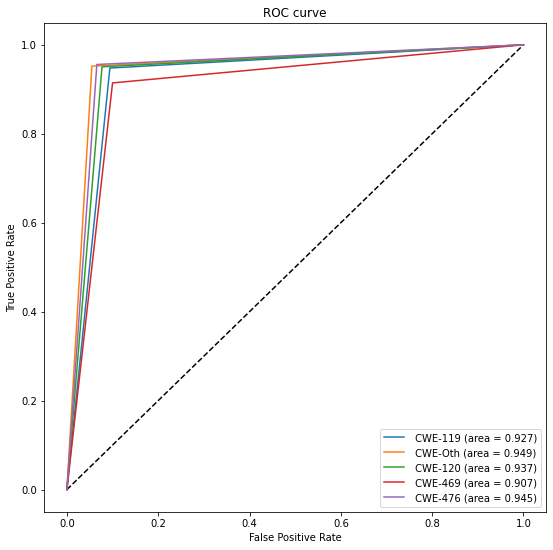

In [ ]:
x_tests = [X_cwe_119_test, X_cwe_other_test, X_cwe_120_test, X_cwe_469_test, X_cwe_476_test]
x_trains = [X_cwe_119_train,X_cwe_other_train,X_cwe_120_train,X_cwe_469_train, X_cwe_476_train]
y_trains = [y_cwe_119_train,y_cwe_other_train,y_cwe_120_train,y_cwe_469_train,y_cwe_476_train]
y_tests = [y_cwe_119_test, y_cwe_other_test, y_cwe_120_test, y_cwe_469_test, y_cwe_476_test]
names = ['CWE-119', 'CWE-Oth', 'CWE-120', 'CWE-469','CWE-476']
generate_roc_plots(x_trains,y_trains,x_tests, y_tests, names)

In [ ]:
def predict_report(train_x,test_x,train_y,test_y):
  svm_model = svm.SVC(decision_function_shape='ovo')  # ovo for classification
  svm_model = svm_model.fit(train_x, train_y)
  y_predict = svm_model.predict(test_x)
  print("Accuracy score %.3f" %metrics.accuracy_score(test_y, y_predict))
  print(classification_report(test_y, y_predict))

print("CWE 119")
predict_report(X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test) ##cwe 119
print("CWE 120")
predict_report(X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test) ##cwe 120
print("CWE 469")
predict_report(X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test) ##cwe 469
print("CWE 476")
predict_report(X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test) ##cwe 476
print("CWE other")
predict_report(X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test) ##cwe other

CWE 119
Accuracy score 0.928
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       255
           1       0.92      0.95      0.93       287

    accuracy                           0.93       542
   macro avg       0.93      0.93      0.93       542
weighted avg       0.93      0.93      0.93       542

CWE 120
Accuracy score 0.598
              precision    recall  f1-score   support

           0       0.63      0.44      0.52       507
           1       0.58      0.75      0.66       525

    accuracy                           0.60      1032
   macro avg       0.61      0.60      0.59      1032
weighted avg       0.61      0.60      0.59      1032

CWE 469
Accuracy score 0.908
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.91      0.91      0.91        35

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.

In [ ]:
##LTSM

In [ ]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.models import Sequential

def load_data(path, column, rdm_state):
    dataframe = pd.read_csv(path)
    y = dataframe[column].astype(int) # numberize the labels i.e., tranforms True = 1, False = 0
    print("Label Distribution: ")
    print(y.value_counts())
    y = y.values 
    X = dataframe.iloc[:, 7:]
    num_features = len(X.columns) 
    X = X.values
    print("Dataset: ")
    print(f"\nShape of features: {X.shape} (# samples, # features, channel) of type {type(X)}" )
    print(f"Shape of labels: {y.shape} (# samples, ) of type {type(X)}" )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=rdm_state)
    return X,X_train, X_test, y_train, y_test

x_119,X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test = load_data('cwe_119_train.csv', 'CWE-119', 42)
x_120,X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test = load_data('cwe_120_train.csv','CWE-120',42)
x_469,X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test = load_data('cwe_469_train.csv','CWE-469',42)
x_476,X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test = load_data('cwe_476_train.csv','CWE-476',42)
x_other,X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test = load_data('cwe_other_train.csv','CWE-other',42)

Label Distribution: 
1    2710
0    2710
Name: CWE-119, dtype: int64
Dataset: 

Shape of features: (5420, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (5420,) (# samples, ) of type <class 'numpy.ndarray'>
Label Distribution: 
1    5159
0    5159
Name: CWE-120, dtype: int64
Dataset: 

Shape of features: (10318, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (10318,) (# samples, ) of type <class 'numpy.ndarray'>
Label Distribution: 
1    324
0    324
Name: CWE-469, dtype: int64
Dataset: 

Shape of features: (648, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (648,) (# samples, ) of type <class 'numpy.ndarray'>
Label Distribution: 
1    1174
0    1174
Name: CWE-476, dtype: int64
Dataset: 

Shape of features: (2348, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (2348,) (# samples, ) of type <class 'numpy.ndarray'>
Label Dist

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(x_119.shape[1],1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_cwe_119_train, y_cwe_119_train,epochs=5,batch_size=64,verbose=2)
scores = model.evaluate(X_cwe_119_test, y_cwe_119_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
77/77 - 99s - loss: 0.6875 - accuracy: 0.5506 - 99s/epoch - 1s/step
Epoch 2/5
77/77 - 95s - loss: 0.6778 - accuracy: 0.5658 - 95s/epoch - 1s/step
Epoch 3/5
77/77 - 95s - loss: 0.6781 - accuracy: 0.5730 - 95s/epoch - 1s/step
Epoch 4/5
77/77 - 96s - loss: 0.6749 - accuracy: 0.5752 - 96s/epoch - 1s/step
Epoch 5/5
77/77 - 97s - loss: 0.6754 - accuracy: 0.5715 - 97s/epoch - 1s/step
Accuracy: 51.85%


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(x_120.shape[1],1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_cwe_120_train, y_cwe_120_train,epochs=5,batch_size=64,verbose=2)
scores = model.evaluate(X_cwe_120_test, y_cwe_120_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
146/146 - 185s - loss: 0.6766 - accuracy: 0.5866 - 185s/epoch - 1s/step
Epoch 2/5
146/146 - 181s - loss: 0.6699 - accuracy: 0.5947 - 181s/epoch - 1s/step
Epoch 3/5
146/146 - 181s - loss: 0.6707 - accuracy: 0.5935 - 181s/epoch - 1s/step
Epoch 4/5
146/146 - 185s - loss: 0.6696 - accuracy: 0.5905 - 185s/epoch - 1s/step
Epoch 5/5
146/146 - 181s - loss: 0.6693 - accuracy: 0.5937 - 181s/epoch - 1s/step
Accuracy: 57.66%


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(x_469.shape[1],1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_cwe_469_train, y_cwe_469_train,epochs=5,batch_size=64,verbose=2)
scores = model.evaluate(X_cwe_469_test, y_cwe_469_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
10/10 - 18s - loss: 0.6922 - accuracy: 0.5472 - 18s/epoch - 2s/step
Epoch 2/5
10/10 - 18s - loss: 0.6799 - accuracy: 0.5746 - 18s/epoch - 2s/step
Epoch 3/5
10/10 - 12s - loss: 0.7045 - accuracy: 0.6123 - 12s/epoch - 1s/step
Epoch 4/5
10/10 - 12s - loss: 0.6837 - accuracy: 0.5437 - 12s/epoch - 1s/step
Epoch 5/5
10/10 - 12s - loss: 0.6865 - accuracy: 0.5146 - 12s/epoch - 1s/step
Accuracy: 47.69%


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(x_476.shape[1],1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_cwe_476_train, y_cwe_476_train,epochs=5,batch_size=64,verbose=2)
scores = model.evaluate(X_cwe_476_test, y_cwe_476_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(x_other.shape[1],1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_cwe_other_train, y_cwe_other_train,epochs=5,batch_size=64,verbose=2)
scores = model.evaluate(X_cwe_other_test, y_cwe_other_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
94/94 - 120s - loss: 0.6971 - accuracy: 0.5128 - 120s/epoch - 1s/step
Epoch 2/5
94/94 - 118s - loss: 0.6909 - accuracy: 0.5153 - 118s/epoch - 1s/step
Epoch 3/5
94/94 - 117s - loss: 0.6840 - accuracy: 0.5497 - 117s/epoch - 1s/step
Epoch 4/5
94/94 - 118s - loss: 0.6798 - accuracy: 0.5656 - 118s/epoch - 1s/step
Epoch 5/5
94/94 - 118s - loss: 0.6785 - accuracy: 0.5648 - 118s/epoch - 1s/step
Accuracy: 56.26%
